In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('ex1data2.txt', delimiter = ',')
X = np.reshape(data[:,0:2], [47,2])
y = np.reshape(data[:,2], [47,1])

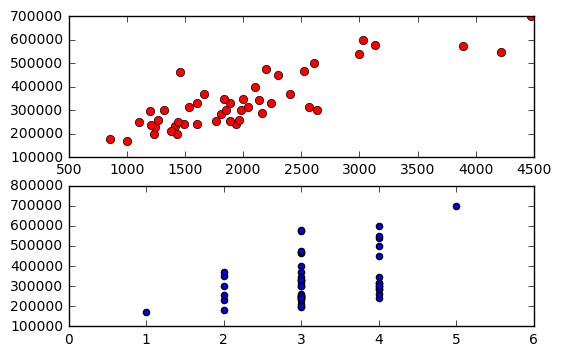

In [2]:
f, (ax1, ax2) = plt.subplots(2)
ax1.plot(X[:,0], y, 'ro')
ax2.scatter(X[:,1], y)
plt.show()

In [3]:
def feature_normalization(X):
    area_mean = np.mean(X[:,0])
    X_area_normalized = (X[:,0] - area_mean)
    area_std = np.std(X[:,0])
    X_area_normalized = X_area_normalized / area_std

    bedroom_mean = np.mean(X[:,1])
    X_bedroom_normalized = (X[:,1] - bedroom_mean)
    bedroom_std = np.std(X[:,1])
    X_bedroom_normalized = X_bedroom_normalized / bedroom_std
    
    return np.column_stack([X_area_normalized, X_bedroom_normalized])

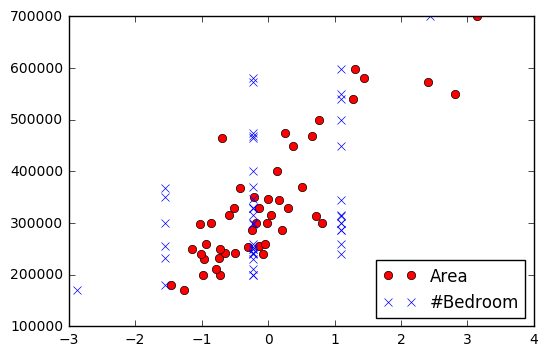

In [4]:
normalized_input = feature_normalization(X)
m = np.shape(normalized_input)[0]
intercept = np.ones([m,1])
normalized_input = np.column_stack([intercept, normalized_input])

plt.plot(normalized_input[:,1], y, 'ro', label = 'Area')
plt.plot(normalized_input[:,2], y, 'bx', label = '#Bedroom')
plt.legend(loc=4)
plt.show()

In [5]:
def calculate_cost(X,y,theta):
    m = np.shape(y)[0]
    hypothesis = np.matmul(X, theta)
    cost = float((np.matmul(np.transpose(hypothesis-y), (hypothesis - y)))/(2*m))
    return cost

In [6]:
def gradient_descent(X,y,theta,alpha):
    num_of_features = np.shape(X)[1]
    J = np.zeros([400,1])
    for i in np.arange(0,400):
        hypothesis = np.matmul(X, theta)
        theta = theta - alpha*np.matmul(normalized_input.T, (hypothesis - y)) / num_of_features
        J[i] = calculate_cost(X,y,theta)
    return (theta, J)

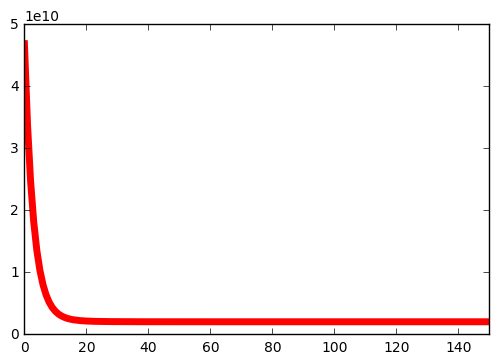

In [9]:
num_of_features = np.shape(normalized_input)[1]

theta = np.zeros([num_of_features,1])
cost = calculate_cost(normalized_input, y, theta)
alpha = 0.01
theta, cost_history = gradient_descent(normalized_input,y,theta,alpha)

plt.plot(np.arange(0,400), cost_history, 'r', linewidth=5)
plt.xlim([0,150])
plt.show()